In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!python3 -c "import torch; print(torch.__version__)"

2.1.0+cu121


In [ ]:
#!pip3 install torch torchvision
import torch
import torch.nn as nn
import numpy as np
from numpy import inf
from tqdm import tqdm

from timeit import default_timer as timer

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Model Evaluation

In [ ]:
!pip install torch-geometric
from torch_geometric.datasets import TUDataset, FakeDataset
import torch_geometric.utils as U

import random
from torch_geometric.datasets import CitationFull
# https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.CitationFull.html#torch_geometric.datasets.CitationFull

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00


In [ ]:
!pip3 install networkx
import networkx as nx

In [ ]:
def get_internet_graph(graph_dim, r = None):
  G = nx.random_internet_as_graph(graph_dim)
  A = nx.adjacency_matrix(G)
  adj_matrix = torch.tensor(A.todense()).float() #.to(device)
  return adj_matrix

In [ ]:
def get_regular_graph(graph_dim, r = None):
  G = nx.random_regular_graph(d=6, n=graph_dim)
  A = nx.adjacency_matrix(G)
  adj_matrix = torch.tensor(A.todense()).float() #.to(device)
  return adj_matrix

In [ ]:
def get_ext_ba_graph(graph_dim, r = None):
  G = nx.extended_barabasi_albert_graph(n=graph_dim, m=2, p=0.2, q=0.1)
  A = nx.adjacency_matrix(G)
  adj_matrix = torch.tensor(A.todense()).float() #.to(device)
  return adj_matrix

In [ ]:
adj_1 = get_ext_ba_graph(1000)
torch.mean(torch.sum(adj_1, 1)).item()

5.136000156402588

In [ ]:
import matplotlib.pyplot as plt
import pickle

In [ ]:
def plot_csv(x, csv_layers, num_samples, log_scale=True, title=""):
  num_plots = len(csv_layers)
  fig, axs = plt.subplots(1, num_plots, figsize=(21,7))

  for i, csv_layer in enumerate(csv_layers):#, csv_numLayer_2, csv_numLayer_3]):
    for y in csv_layer:
      y = [item/num_samples for item in y]
      axs[i].plot(x,y)# divide by 32
    axs[i].set_xlabel('Graph sizes')
    axs[i].set_ylabel('Graphs classified as 1 (%)')
    if log_scale:
      axs[i].set_xscale("log")
    axs[i].set_title(f'SumGNN with T = {i+1}')

  fig.suptitle(title, fontsize=20)
  fig.show()

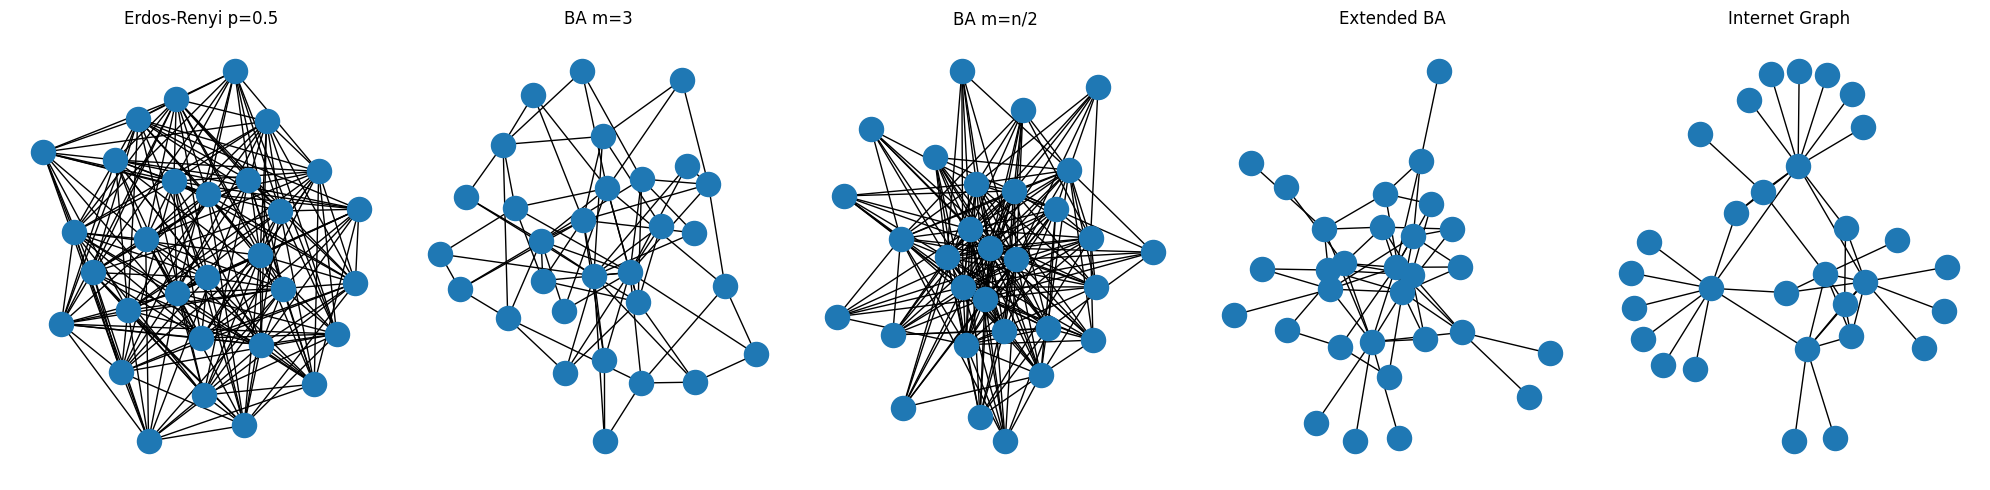

In [ ]:
n = 30
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

graphs = [nx.erdos_renyi_graph(n, 0.5),
          nx.barabasi_albert_graph(n, 3),
          nx.barabasi_albert_graph(n, n//2),
          nx.extended_barabasi_albert_graph(n=n, m=1, p=0.5, q=0.05),
          nx.random_internet_as_graph(n)]
title = ["Erdos-Renyi p=0.5", "BA m=3", "BA m=n/2", "Extended BA", "Internet Graph"]
for i in range(len(graphs)):
  nx.draw(graphs[i], ax=axs[i])
  axs[i].set_title(title[i])

plt.tight_layout()
plt.show()

In [ ]:
from torch_geometric.datasets import CitationFull

In [ ]:
# Load Cora-ML dataset
data = CitationFull(root='', name = "Cora_ML")

# Access the dataset's graph and labels
cora_ML = data[0]
cora_ML_adj = U.to_dense_adj(cora_ML.edge_index).squeeze(0).to(device)
cora_ML_x = cora_ML.x[:,0:64].to(device)
print(cora_ML)
new_x = cora_ML.x[:,0:64]
print(new_x.shape)
print(cora_ML_adj.shape)
torch.mean(torch.sum(cora_ML_adj, 1)).item()  ### mean degree

Processing...
Done!


Data(x=[2995, 2879], edge_index=[2, 16316], y=[2995])
torch.Size([2995, 64])
torch.Size([2995, 2995])


5.447746276855469

In [ ]:
cora_ML.edge_index

tensor([[   0,    0,    0,  ..., 2993, 2993, 2994],
        [1636, 1638, 2357,  ...,  745, 1865, 1452]])

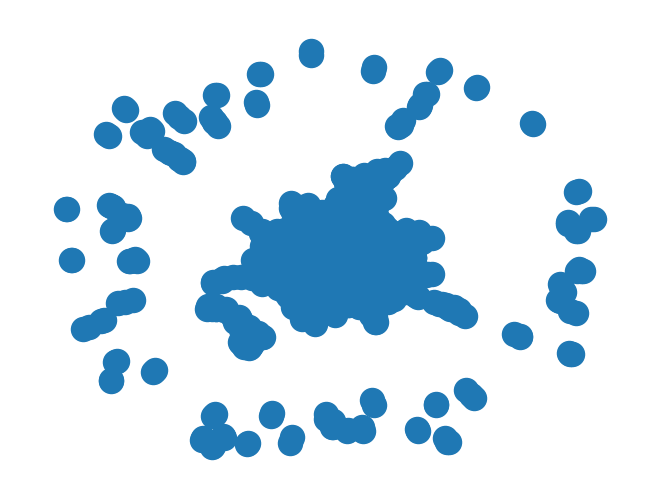

In [ ]:
# G = U.to_networkx(cora_ML)
# nx.draw(G)
# plt.draw()